## Transfer Learning Inception V3

In [2]:
# importing the libraries 

from tensorflow.keras.layers import  Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
test_path = 'Datasets/test'
valid_path = 'Datasets/val'


In [5]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of InceptionV3
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# output layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [7]:

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [8]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size 
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 744 images belonging to 4 classes.


In [14]:
validation_set = test_datagen.flow_from_directory('Datasets/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 101 images belonging to 4 classes.


## fitting the model

In [33]:

r = model.fit(
  training_set,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

Epoch 1/10
24/24 [==============================] - 64s 3s/step - loss: 0.5898 - accuracy: 0.8495 - val_loss: 2.1789 - val_accuracy: 0.6832
Epoch 2/10
24/24 [==============================] - 60s 2s/step - loss: 0.3438 - accuracy: 0.9073 - val_loss: 1.6488 - val_accuracy: 0.7030
Epoch 3/10
24/24 [==============================] - 63s 3s/step - loss: 0.2767 - accuracy: 0.9234 - val_loss: 1.8407 - val_accuracy: 0.6931
Epoch 4/10
24/24 [==============================] - 59s 2s/step - loss: 0.2161 - accuracy: 0.9368 - val_loss: 1.5350 - val_accuracy: 0.7129
Epoch 5/10
24/24 [==============================] - 58s 2s/step - loss: 0.4320 - accuracy: 0.8978 - val_loss: 2.0477 - val_accuracy: 0.6832
Epoch 6/10
24/24 [==============================] - 58s 2s/step - loss: 0.6074 - accuracy: 0.8737 - val_loss: 1.8724 - val_accuracy: 0.7228
Epoch 7/10
24/24 [==============================] - 59s 2s/step - loss: 0.3145 - accuracy: 0.9113 - val_loss: 2.0646 - val_accuracy: 0.7228
Epoch 8/10
24/24 [==

## Plotting loss and accuracy

In [16]:
import matplotlib.pyplot as plt

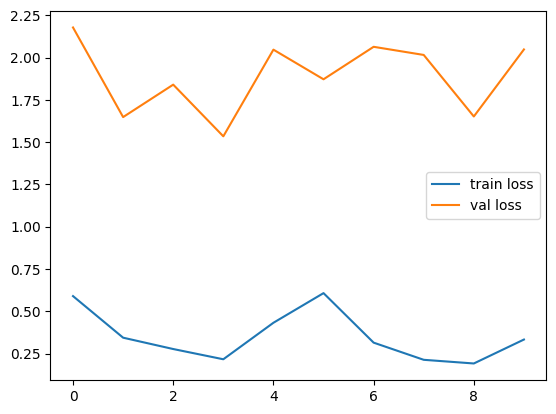

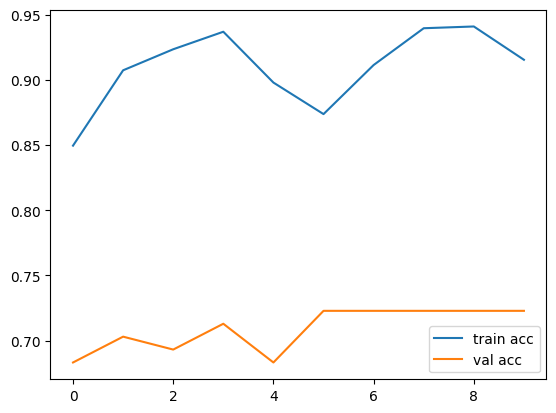

In [34]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Saving the model to reuse

In [35]:

model.save('model_inception_car_brand.h5')

## predicting using validation set 

In [36]:

y_pred = model.predict(validation_set)


In [37]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)#getting index having max value

In [38]:
y_pred

array([1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 3, 3, 0, 2, 3, 0, 3, 0, 0, 3, 0,
       0, 1, 3, 2, 3, 1, 3, 1, 0, 2, 0, 0, 3, 3, 0, 0, 2, 2, 1, 0, 0, 2,
       3, 1, 0, 1, 2, 1, 3, 3, 3, 1, 2, 1, 2, 0, 0, 3, 1, 0, 3, 0, 2, 1,
       1, 0, 1, 1, 3, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 3,
       3, 1, 3, 3, 0, 1, 2, 1, 0, 1, 0, 2, 0], dtype=int64)

## Predicting  Multiple  images in test set

In [39]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [40]:
model=load_model('model_inception_car_brand.h5')

In [43]:
import glob
cv_img=[]
col_dir='Datasets/test/Jaguar/*.jpg'
for img in glob.glob(col_dir):
    img=image.load_img(img,target_size=(224,224))
    x=image.img_to_array(img)
    x=x/255
    x=np.expand_dims(x,axis=0)
    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The car is BMW"
    elif preds==1:
        preds="The car is Jaguar"
    elif preds==2:
        preds="The car is ROlls Royce"
    else:
        preds="The car is BEnz"
    print(preds)
    
    

The car is Jaguar
The car is Jaguar
The car is BMW
The car is BMW
The car is Jaguar
The car is Jaguar
The car is Jaguar
The car is Jaguar
The car is Jaguar
The car is Jaguar
